#                                           FIFA PROJECT

A data scientist who wishes to make it big by becoming a football club manager. Our aim is to found out the best squad for the upcoming football championship

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split

## DATASET:

In [3]:
path ="./data/file.csv"
df = pd.read_csv(path)

F:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (22,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(100) # visual representation of dataset

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€92M,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,€64.5M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,€90.5M,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€79M,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,€77M,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


# Subsetting the data :
In this task we will create a dataframe only with few columns that are required for analysis

In [5]:
df=df[[ 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Preferred Positions','Wage']]
df

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Positions,Wage
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,ST LW,€565K
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,RW,€565K
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,LW,€280K
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,ST,€510K
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,GK,€230K
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,ST,€355K
6,De Gea,26,Spain,90,92,Manchester United,€64.5M,GK,€215K
7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,LW,€295K
8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,CDM CM,€340K
9,G. Higuaín,29,Argentina,90,90,Juventus,€77M,ST,€275K


# Data Preprocessing 
We need the data in structured format for that cleansing of data is necessary for better analysis

In [6]:
df['Unit'] = df['Value'].str[-1]
df['Value (M)'] = np.where(df['Unit'] == '0', 0, df['Value'].str[1:-1].replace(r'[a-zA-Z]', ''))
df['Value (M)'] = df['Value (M)'].astype(float)
df['Value (M)'] = np.where(df['Unit'] == 'M', df['Value (M)'], df['Value (M)']/1000)

# Removes the symbol from Wage
df['Unit2'] = df['Wage'].str[-1]
df['Wage (M)'] = np.where(df['Unit2'] == '0', 0, df['Wage'].str[1:-1].replace(r'[a-zA-Z]', ''))
df['Wage (M)'] = df['Wage (M)'].astype(float)
df['Wage (M)'] = np.where(df['Unit2'] == 'M', df['Wage (M)'], df['Wage (M)']/1000)

# Drop the Unit and Unit2 from df
df = df.drop(['Unit', 'Unit2'], 1)

# New column position
df['Position'] = df['Preferred Positions'].str.split().str[0]


# TOP 100 PLAYERS
QUESTIONS TRIED TO SOLVE:
1. The total no. of players for each positions 
2. TOP 100 highly paid wages
3. Does the wages are depend  on the overall potential score of player 

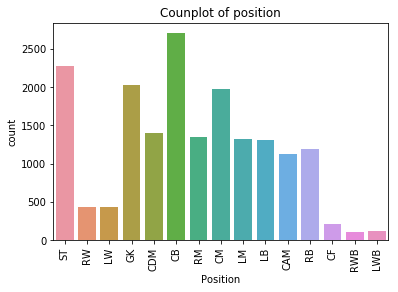

                 Name  Overall  Wage (M)
0   Cristiano Ronaldo       94     565.0
1            L. Messi       93     565.0
2           L. Suárez       92     280.0
3             G. Bale       89     510.0
4      R. Lewandowski       91     230.0
5           L. Modrić       89     355.0
6            T. Kroos       90     215.0
7           S. Agüero       89     295.0
8        Sergio Ramos       90     340.0
9           E. Hazard       90     275.0
10         K. Benzema       86     310.0
11       K. De Bruyne       89     285.0
12             Neymar       92     190.0
13         I. Rakitić       87     265.0
14         G. Higuaín       90     340.0
15         A. Sánchez       89     370.0
16            M. Özil       88     325.0
17            Iniesta       87     225.0
18            Marcelo       87     110.0
19       J. Rodríguez       86     215.0
20    Sergio Busquets       86      82.0
21               Isco       86     150.0
22              Piqué       87     225.0
23     Z. Ibrahi

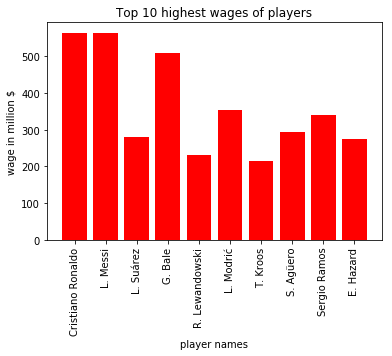

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt
#The total no. of players for each positions 
sns.countplot(x='Position',data=df)
plt.xticks(rotation=90)
plt.title('Counplot of position')
plt.show()

#TOP 100 highly paid wages
value_distribution_values = df.sort_values("Wage (M)", ascending=False).reset_index().head(100)[["Name", "Wage (M)"]]
df2 = pd.DataFrame(value_distribution_values)
df2['Wage (M)']=df['Wage (M)']*1000
x=df2['Name'].head(10)
y=df2['Wage (M)'].head(10)
plt.bar(x,y,color='red')
plt.xticks(rotation=90)
plt.xlabel('player names')
plt.ylabel('wage in million $')
plt.title('Top 10 highest wages of players')

#Does the wages are depend  on the overall potential score of player ?
Overall_wage = df.sort_values("Wage (M)", ascending=False).reset_index().head(100)[['Name',"Overall", "Wage (M)"]]
df3 = pd.DataFrame(Overall_wage)
df3['Wage (M)']=df['Wage (M)']*1000
print(df3.head(100))

## FINDING THE BEST SQUAD !!
The team selection is generally based on the type of formation it is gonna keep in the field i.e for every different formation on field team selection may differ 
The type of formation taken into consideration are as follows :
1. 4-3-3
2. 3-5-2

In [8]:
p_list_1= ['GK', 'LB', 'RB', 'CB', 'CAM', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW'] # 4-3-3
p_list_2 = ['GK', 'LWB', 'CB', 'RWB', 'LM', 'CDM', 'CAM', 'CM', 'RM', 'LW', 'RW'] # 3-5-2


In [9]:
# 4-3-3 formation
df_copy = df[['Name','Overall','Position']]
df1=[]
for i in p_list_1:
    df1.append([i, df_copy.loc[[df_copy[df_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index=False), 
                  df_copy[df_copy['Position'] == i]['Overall'].max()])
df2=pd.DataFrame(df1)
df2.rename(columns={0:'Position',1:'Player Name',2:'Overall'},inplace=True)
print(df2)


   Position        Player Name  Overall
0        GK           M. Neuer       92
1        LB            Marcelo       87
2        RB           Carvajal       84
3        CB       Sergio Ramos       90
4       CAM           Coutinho       86
5        LM         C. Eriksen       87
6       CDM           T. Kroos       90
7        RM       K. De Bruyne       89
8        LW             Neymar       92
9        ST  Cristiano Ronaldo       94
10       RW           L. Messi       93


In [10]:
#3-5-2 formation
df3=[]
for i in p_list_2:
    df3.append([i,df_copy.loc[[df_copy[df_copy['Position']==i]['Overall'].idxmax()]]['Name'].to_string(index=False),
               df_copy[df_copy['Position']==i]['Overall'].max()])
df4=pd.DataFrame(df3)
df4.rename(columns={0:'Position',1:'Player Name',2:'Overall'},inplace=True)
print(df4)

   Position   Player Name  Overall
0        GK      M. Neuer       92
1       LWB       D. Rose       82
2        CB  Sergio Ramos       90
3       RWB     K. Walker       83
4        LM    C. Eriksen       87
5       CDM      T. Kroos       90
6       CAM      Coutinho       86
7        CM      N. Kanté       87
8        RM  K. De Bruyne       89
9        LW        Neymar       92
10       RW      L. Messi       93


## PLAYER TRANSFER 
The summer market transfer window has arrived but don't know at what price range should we buy the players . As a data scientist we need to predict the suitable price based on factors like overall,potential,wages



In [28]:
X= df[['Potential','Overall','Wage (M)']]
y = df['Value (M)']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=43)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2= r2_score(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
print('r2 score:',r2)
print('mean absoloute error:',mae)
X_test['Value (M)']=y_pred
X_test['Wage (M)']= X_test['Wage (M)']*1000
X_test

r2 score: 0.6846143710950761
mean absoloute error: 1.3406649210239672


F:\ANACONDA\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
F:\ANACONDA\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Potential,Overall,Wage (M),Value (M)
15083,72,59,1.0,0.185992
613,79,79,31.0,7.677327
5264,76,70,8.0,2.800238
3977,72,72,36.0,6.931324
1411,76,76,18.0,4.924812
1848,80,75,18.0,5.378445
16147,76,57,1.0,0.553290
14340,72,61,1.0,0.358662
3382,72,72,12.0,3.075566
2608,74,74,42.0,8.337916


## Polynomial Regression
The model accuracy achieved using linear regression model is very low hence to increase the model accuracy we will be using polynomial regression model

In [45]:
from sklearn.preprocessing import PolynomialFeatures
X= df[['Potential','Overall','Wage (M)']]
y = df['Value (M)']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=43)
# Instantiate third degree polynomial features
poly = PolynomialFeatures(degree=3)
    
# fit and transform polynomial features on X_train    
X_train_2 = poly.fit_transform(X_train)

# instantiate Linear regression model
model=LinearRegression()

# fit the model 
model.fit(X_train_2,y_train)
    
# transform on x_test    
X_test_2 = poly.transform(X_test)

# predict the model performance
y_pred_2=model.predict(X_test_2)
    
# Calculate the mean absolute error    
mae= mean_absolute_error(y_test, y_pred_2)
print ('mean absolute error:',mae)

# calculate the r2 score
r2= r2_score(y_test, y_pred_2)
print('r2 score:',r2)

mean absolute error: 0.5202558356125155
r2 score: 0.9356440768641257
